# UNIVERSIDAD DEL VALLE DE GUATEMALA  
## CC 3085 – Inteligencia Artificial  
### Sección 10  
#### Luis Alberto Suriano  

## **Corto #2**  

**Integrantes:**  
- **Andy Fuentes** - 22944  
- **Diederich Solís** - 22952  
- **Davis Roldan** - 22672  

Guatemala, enero del 2025  

## Introducción
El aprendizaje por refuerzo es un enfoque poderoso para entrenar agentes en entornos dinámicos, donde deben aprender a tomar decisiones óptimas basándose en la retroalimentación del entorno. En este experimento, se utiliza Q-learning, un algoritmo de aprendizaje por refuerzo basado en tablas, para entrenar un agente en el entorno Frozen Lake de Gymnasium.

El objetivo del agente es aprender a navegar de manera eficiente en un lago congelado con superficies resbaladizas (is_slippery=True), maximizando su recompensa mientras evita caer en agujeros. Para lograrlo, se implementa una estrategia de exploración y explotación mediante una política ε-greedy, la cual disminuye el valor de ε conforme el agente aprende.

El entrenamiento se realiza mediante la ecuación de Bellman, actualizando una tabla de valores Q-table con las recompensas obtenidas a lo largo de los episodios. Posteriormente, el agente es evaluado en episodios de prueba donde siempre elige la acción con mejor Q-value para medir su desempeño.

<a href="https://colab.research.google.com/github/Andyfer004/Corto2-IA/blob/main/Corto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrenamiento y Evaluación del Agente con Q-learning en Frozen Lake  
En este fragmento de código, se entrena un agente utilizando **Q-learning** en un entorno de **Frozen Lake** con `slippery=True`.  
Se inicializa la **Q-table**, se define la política **ε-greedy** con decaimiento y se realiza la actualización de valores utilizando la **ecuación de Bellman**.  
Luego, el agente se evalúa ejecutando **100 episodios de prueba**, donde siempre elige la acción con mejor Q-value para medir su rendimiento.  
Además, se generan dos gráficas:  
- **Recompensa promedio móvil:** para observar la mejora del agente en el tiempo.  
- **Decaimiento de ε:** para ver cómo la exploración disminuye conforme aprende.  

Entrenamiento finalizado.

Q-table final:
[[2.46682646e-01 8.46272785e-02 9.28409016e-02 9.05559289e-02]
 [5.94206058e-03 2.23152192e-02 4.57973991e-03 8.91373129e-02]
 [5.14329803e-03 1.83488735e-01 8.47120055e-03 8.40742147e-03]
 [3.33686290e-03 1.96237518e-03 1.87662433e-04 9.66933111e-02]
 [3.48522887e-01 1.31755020e-03 6.27426148e-02 7.11314143e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.55657568e-04 4.93345496e-08 3.59827891e-02 5.27372673e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.74806718e-02 1.39473950e-01 6.55391772e-03 5.67821068e-01]
 [1.47968480e-02 7.27920560e-01 3.62390554e-02 1.56289201e-04]
 [8.94847584e-01 3.26886842e-03 7.77760362e-04 8.92707379e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.40796074e-02 1.71635914e-02 2.54261265e-01 8.66586085e-02]
 [1.82268813e-01 9.94110453e-01 1.77046414e-01 1.58001188e-01]
 [0.00000000e

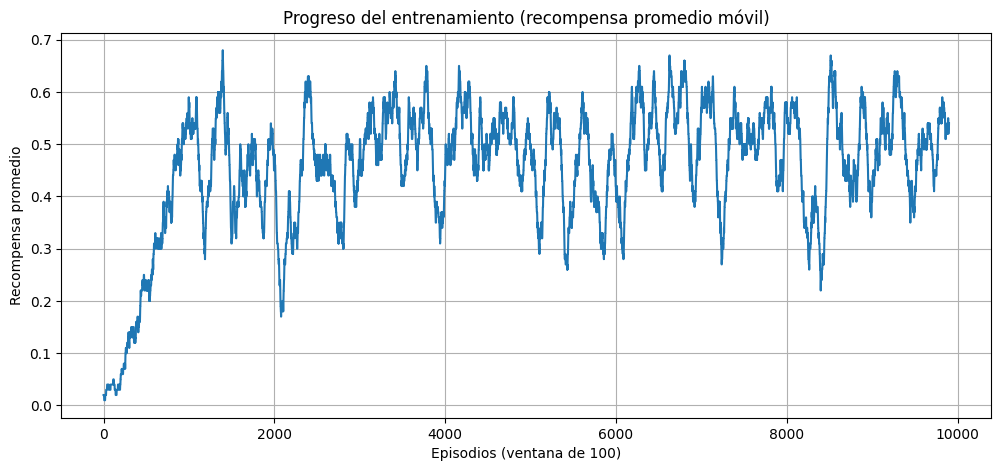

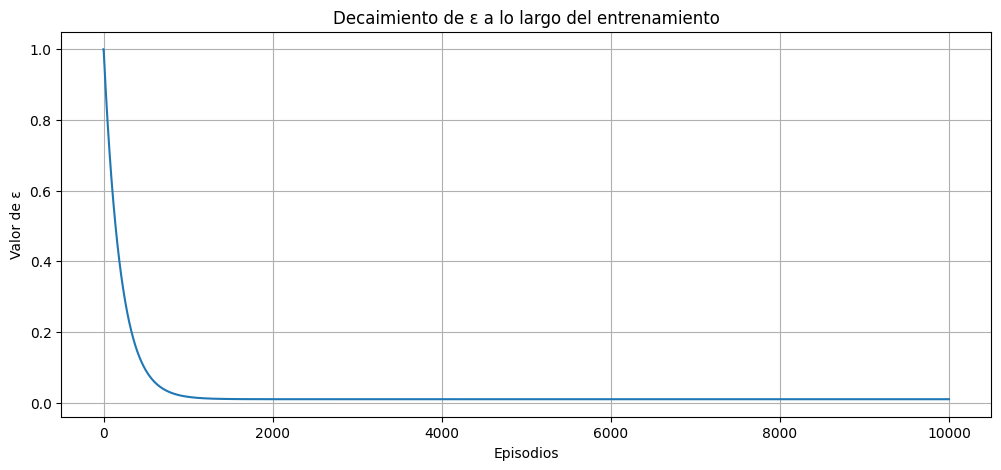

In [5]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt

# Crear el entorno FrozenLake con is_slippery=True y mapa 4x4
env = gym.make("FrozenLake-v1", is_slippery=True, map_name="4x4")

# Inicialización de la Q-table (número de estados x número de acciones)
n_states = env.observation_space.n
n_actions = env.action_space.n
Q = np.zeros((n_states, n_actions))

# Parámetros del algoritmo
n_episodes = 10000      # Número total de episodios de entrenamiento
max_steps = 100         # Pasos máximos por episodio
learning_rate = 0.8     # Tasa de aprendizaje (α)
discount_factor = 0.95  # Factor de descuento (γ)

# Parámetros para la política ε-greedy
epsilon = 1.0           # Valor inicial de ε (exploración total)
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.005      # Tasa de decaimiento de ε

# Variables para registrar recompensas y valores de ε en cada episodio
rewards_per_episode = []
epsilon_values = []

# Entrenamiento con Q-learning
for episode in range(n_episodes):
    state, _ = env.reset()  # Reiniciar el entorno
    total_reward = 0
    done = False

    for step in range(max_steps):
        # Selección de acción con política ε-greedy
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Exploración: acción aleatoria
        else:
            action = np.argmax(Q[state, :])       # Explotación: acción con mayor valor Q

        new_state, reward, done, truncated, _ = env.step(action)

        # Actualización de la Q-table (Ecuación de Bellman)
        Q[state, action] = Q[state, action] + learning_rate * (
            reward + discount_factor * np.max(Q[new_state, :]) - Q[state, action]
        )

        state = new_state
        total_reward += reward

        if done:
            break

    rewards_per_episode.append(total_reward)
    epsilon_values.append(epsilon)

    # Actualización de ε con decaimiento exponencial
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)

print("Entrenamiento finalizado.\n")
print("Q-table final:")
print(Q)

# Evaluación del agente entrenado
n_test_episodes = 100
rewards_test = []

for episode in range(n_test_episodes):
    state, _ = env.reset()
    total_reward = 0
    done = False

    for step in range(max_steps):
        # Seleccionar siempre la mejor acción (explotación)
        action = np.argmax(Q[state, :])
        state, reward, done, truncated, _ = env.step(action)
        total_reward += reward
        if done:
            break
    rewards_test.append(total_reward)

print("\nRecompensa promedio en la evaluación:", np.mean(rewards_test))

# Visualización del entrenamiento
# 1. Gráfica de la recompensa promedio móvil
window_size = 100  # Tamaño de la ventana para suavizar la recompensa
moving_avg_rewards = np.convolve(rewards_per_episode, np.ones(window_size)/window_size, mode='valid')

plt.figure(figsize=(12, 5))
plt.plot(moving_avg_rewards)
plt.xlabel('Episodios (ventana de 100)')
plt.ylabel('Recompensa promedio')
plt.title('Progreso del entrenamiento (recompensa promedio móvil)')
plt.grid(True)
plt.show()

# 2. Gráfica del decaimiento de ε durante el entrenamiento
plt.figure(figsize=(12, 5))
plt.plot(epsilon_values)
plt.xlabel('Episodios')
plt.ylabel('Valor de ε')
plt.title('Decaimiento de ε a lo largo del entrenamiento')
plt.grid(True)
plt.show()

# Simulación Visual del Agente en Frozen Lake  
Aquí se implementa una **visualización interactiva** del juego utilizando `matplotlib`.  
Se representa el tablero con colores para cada tipo de casilla (inicio, camino seguro, agujeros y meta) y se marca la posición del jugador con un **círculo azul**.  
El agente se mueve según su política aprendida en la Q-table, mostrando en tiempo real cómo navega el entorno hasta llegar a la meta o caer en un agujero.  


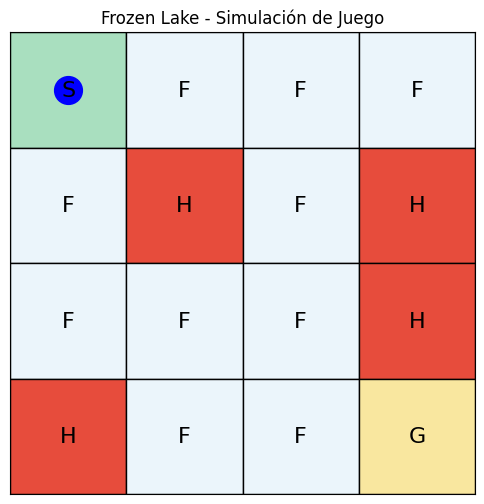

Estado: 0 → Acción: 0


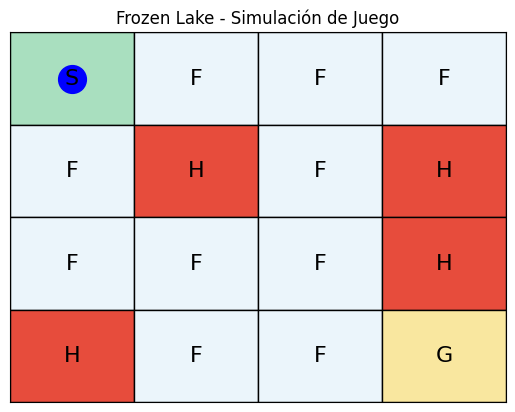

Estado: 0 → Acción: 0


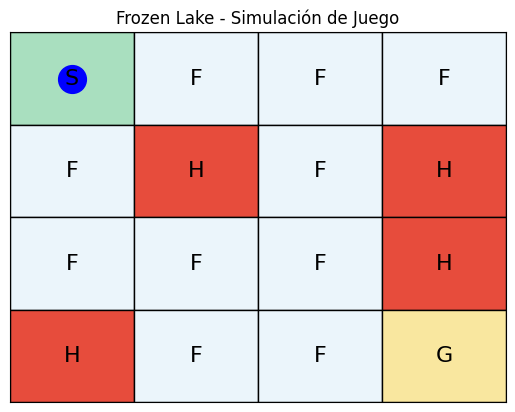

Estado: 0 → Acción: 0


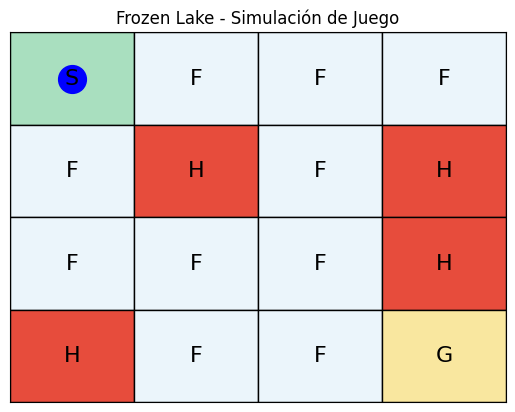

Estado: 0 → Acción: 0


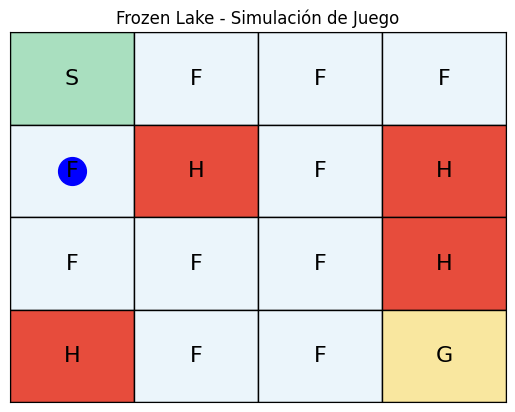

Estado: 4 → Acción: 0


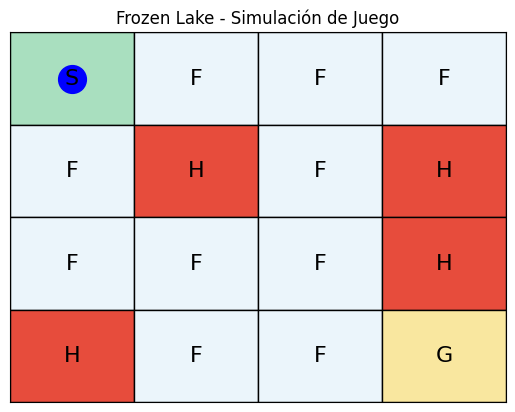

Estado: 0 → Acción: 0


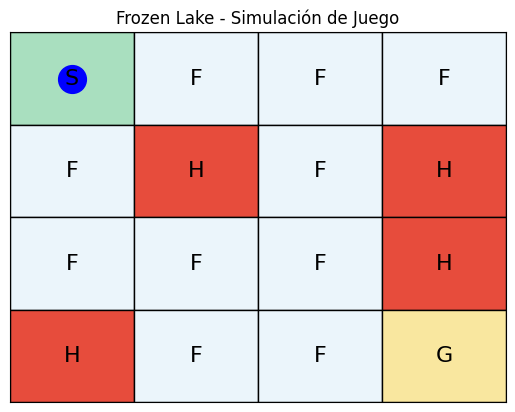

Estado: 0 → Acción: 0


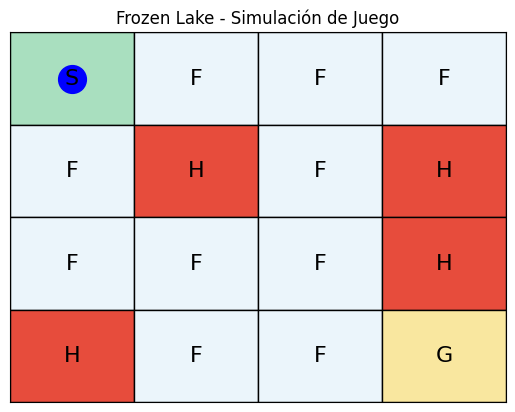

Estado: 0 → Acción: 0


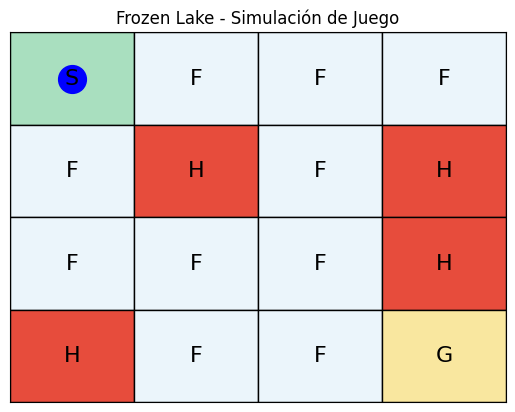

Estado: 0 → Acción: 0


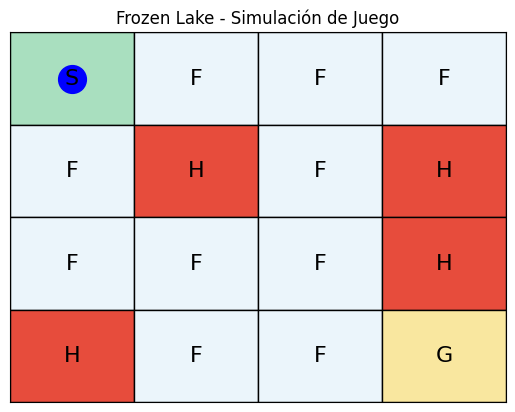

Estado: 0 → Acción: 0


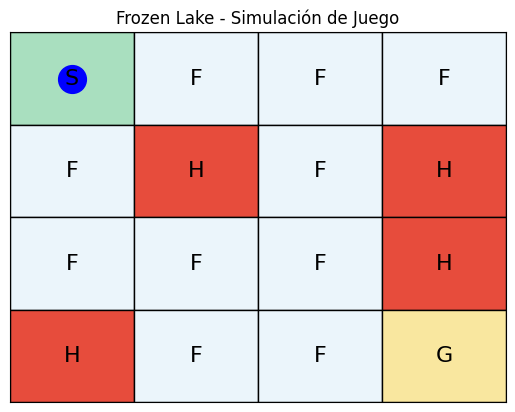

Estado: 0 → Acción: 0


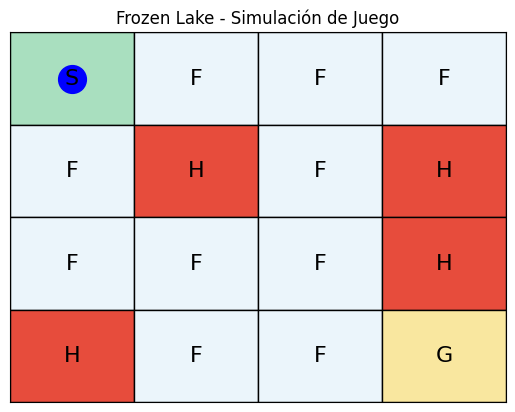

Estado: 0 → Acción: 0


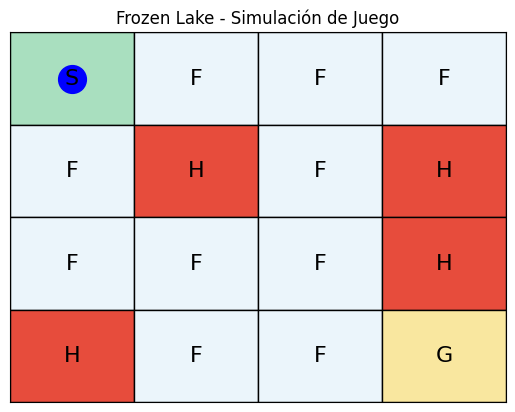

Estado: 0 → Acción: 0


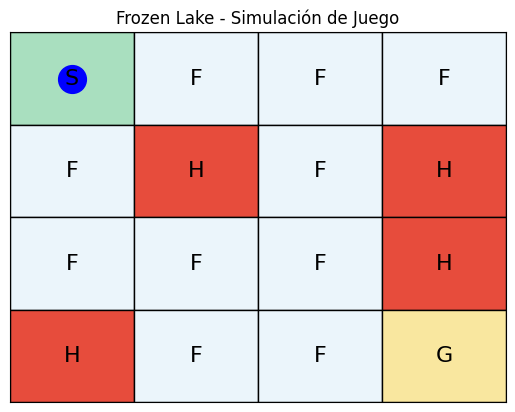

Estado: 0 → Acción: 0


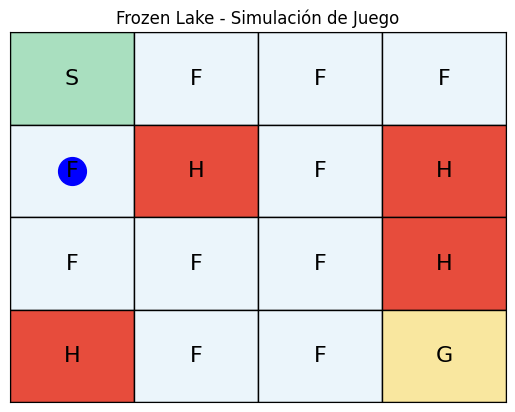

Estado: 4 → Acción: 0


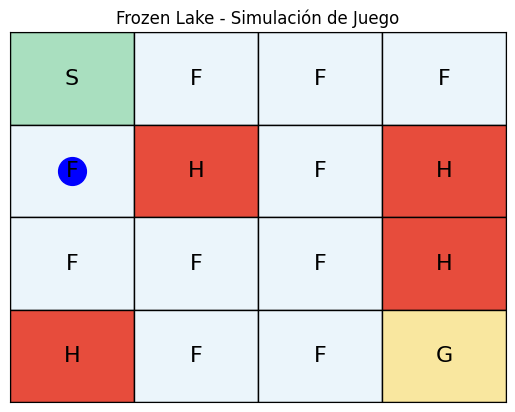

Estado: 4 → Acción: 0


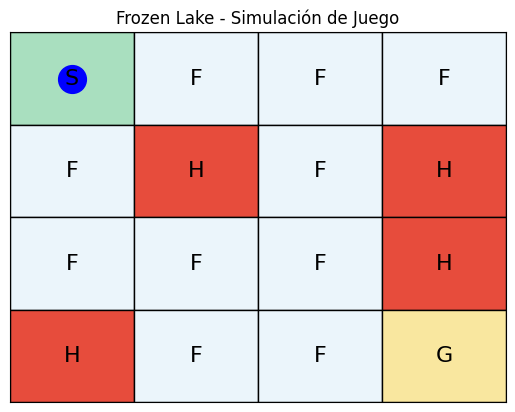

Estado: 0 → Acción: 0


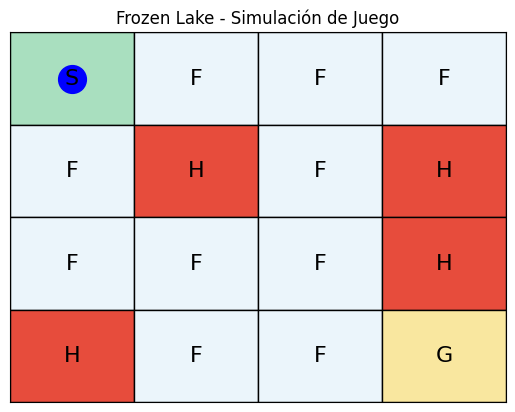

Estado: 0 → Acción: 0


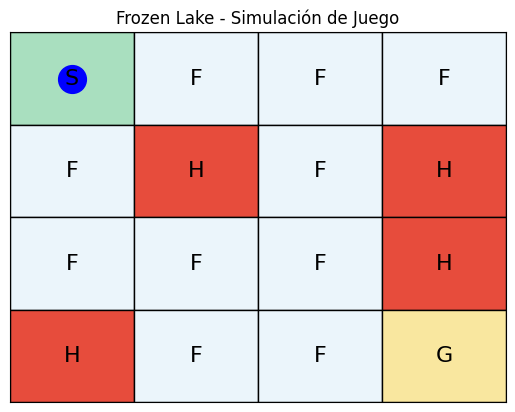

Estado: 0 → Acción: 0


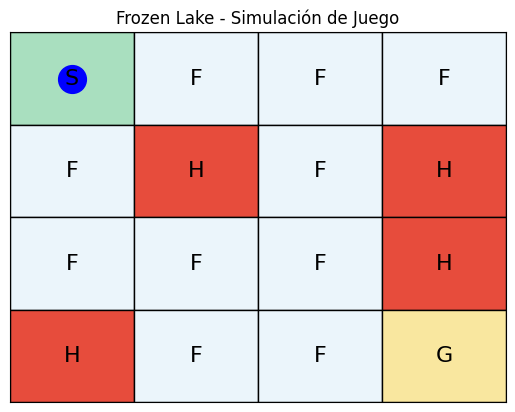

Estado: 0 → Acción: 0


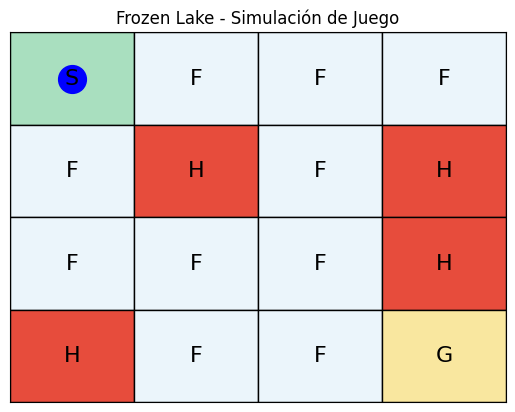

Estado: 0 → Acción: 0


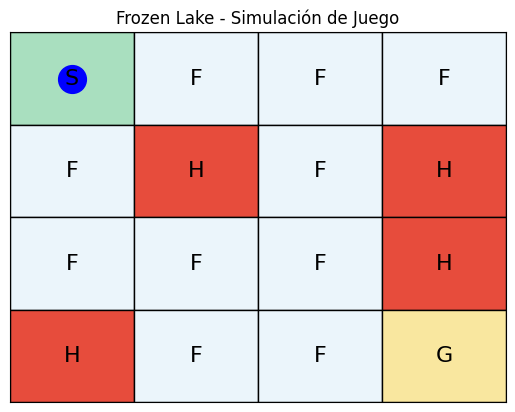

Estado: 0 → Acción: 0


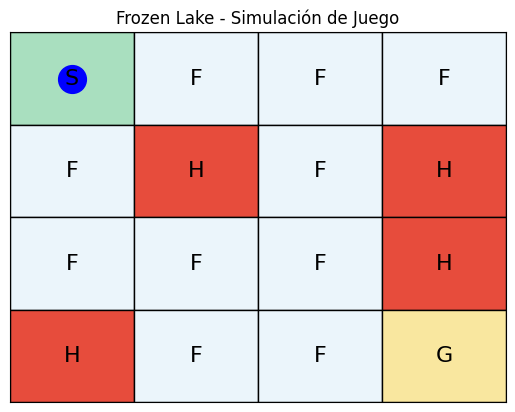

Estado: 0 → Acción: 0


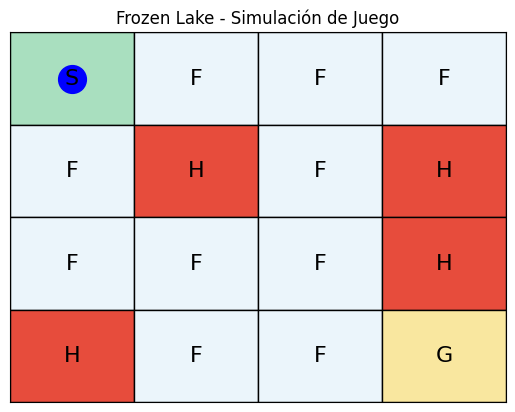

Estado: 0 → Acción: 0


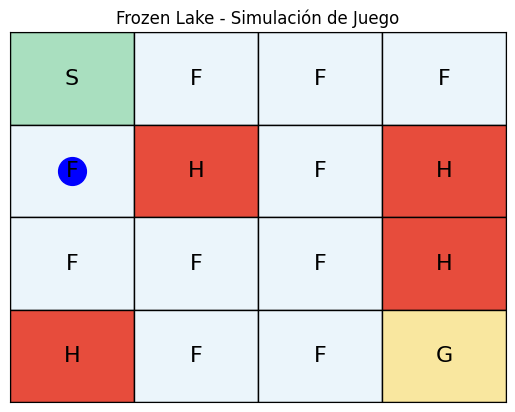

Estado: 4 → Acción: 0


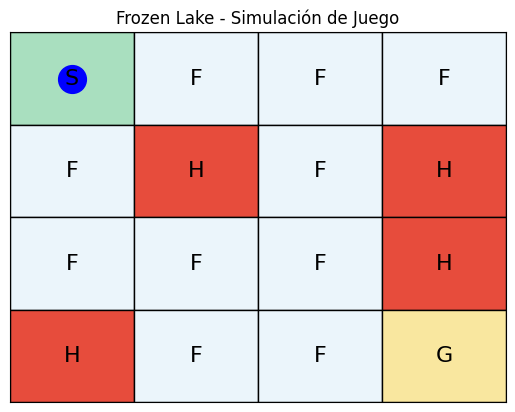

Estado: 0 → Acción: 0


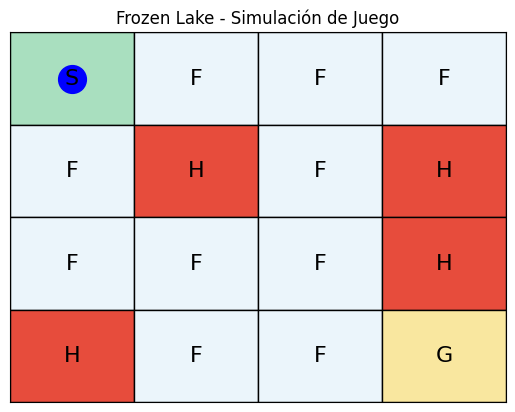

Estado: 0 → Acción: 0


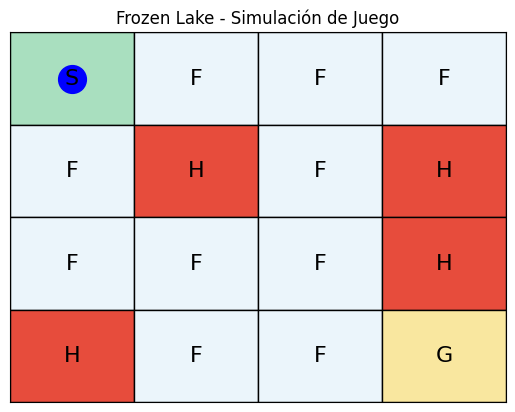

Estado: 0 → Acción: 0


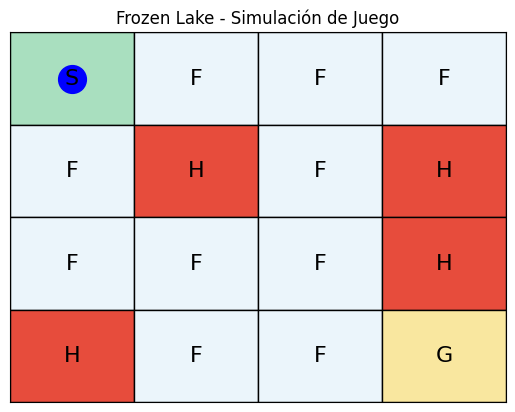

Estado: 0 → Acción: 0


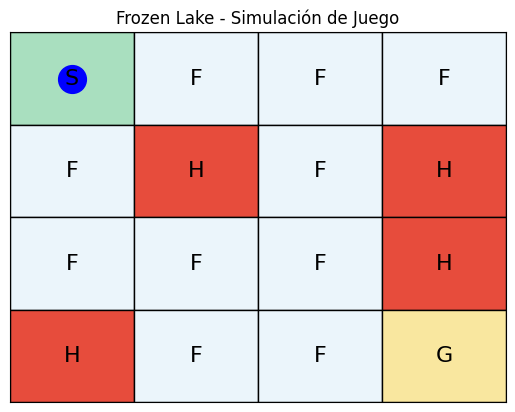

Estado: 0 → Acción: 0


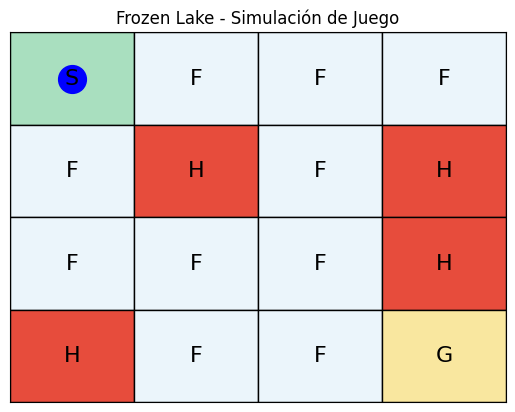

Estado: 0 → Acción: 0


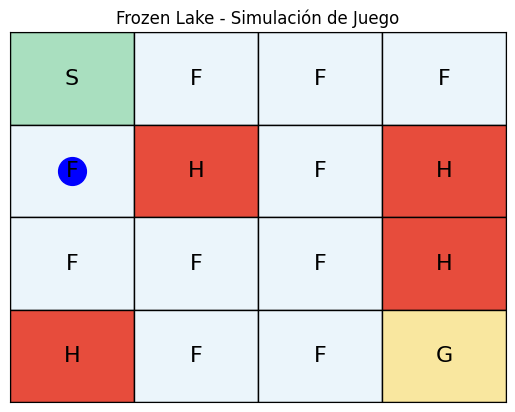

Estado: 4 → Acción: 0


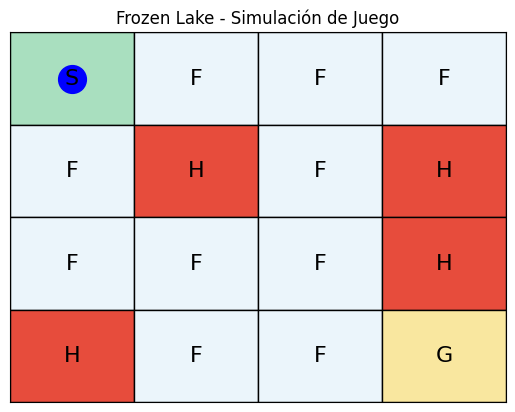

Estado: 0 → Acción: 0


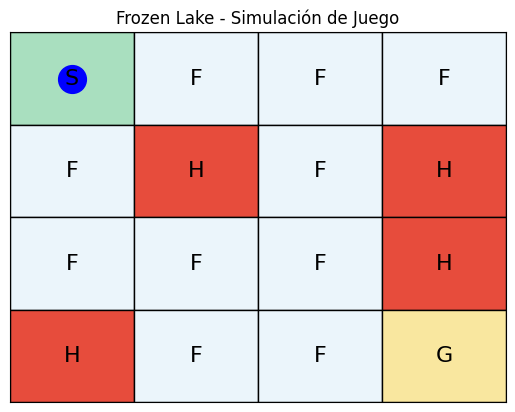

Estado: 0 → Acción: 0


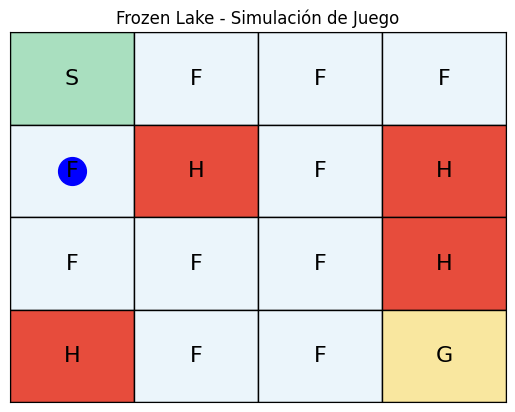

Estado: 4 → Acción: 0


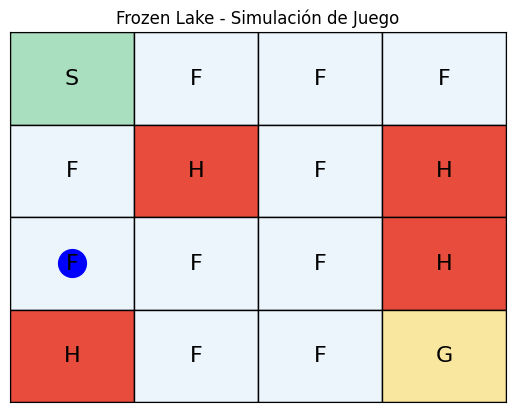

Estado: 8 → Acción: 3


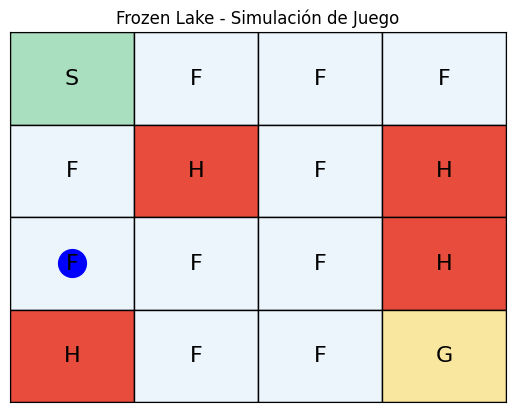

Estado: 8 → Acción: 3


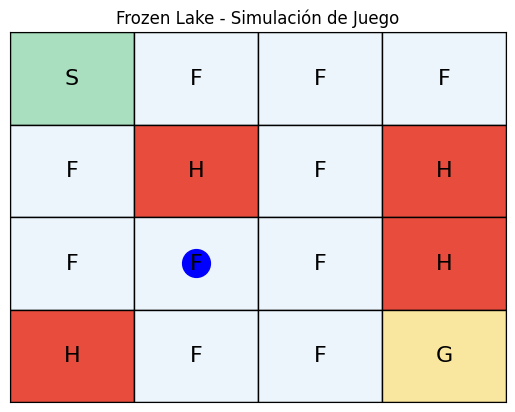

Estado: 9 → Acción: 1


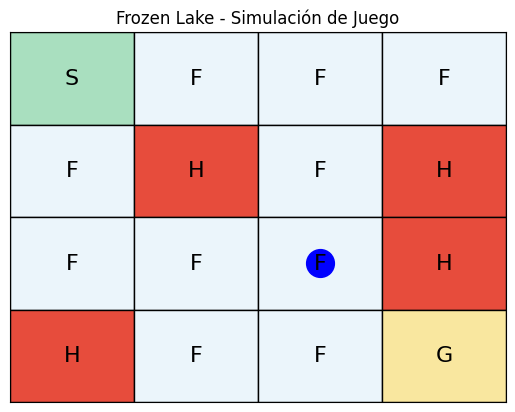

Estado: 10 → Acción: 0


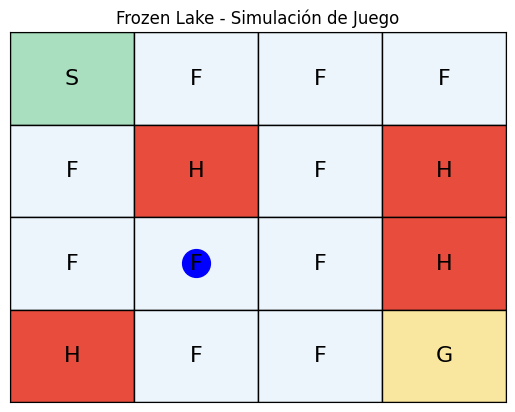

Estado: 9 → Acción: 1


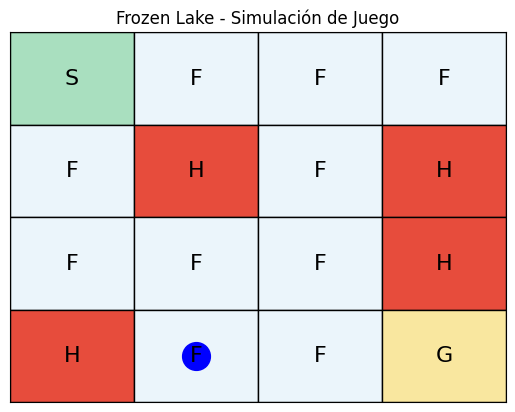

Estado: 13 → Acción: 2


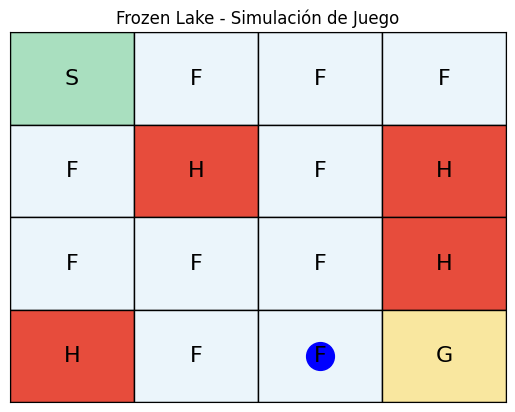

Estado: 14 → Acción: 1


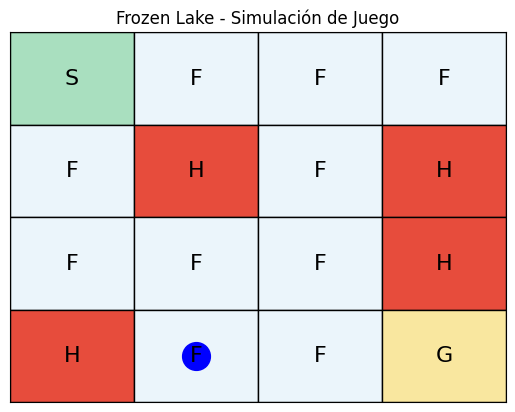

Estado: 13 → Acción: 2


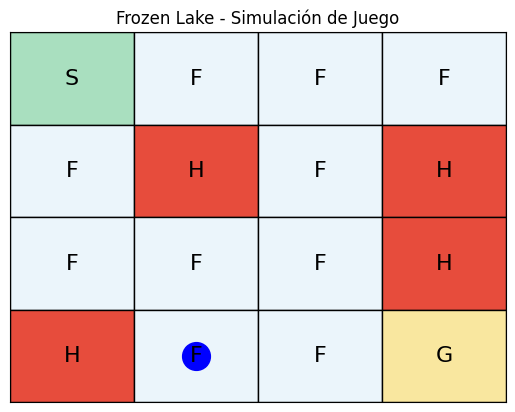

Estado: 13 → Acción: 2


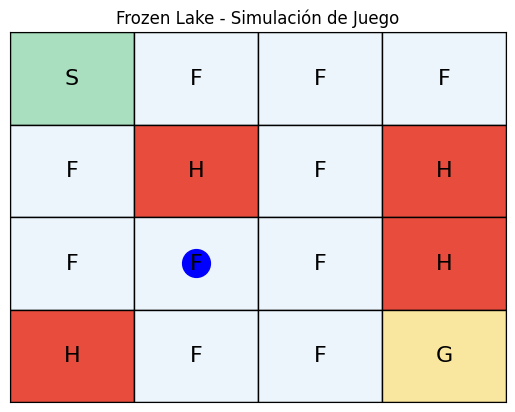

Estado: 9 → Acción: 1


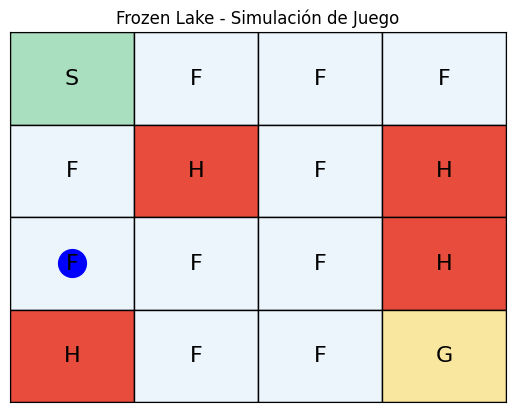

Estado: 8 → Acción: 3


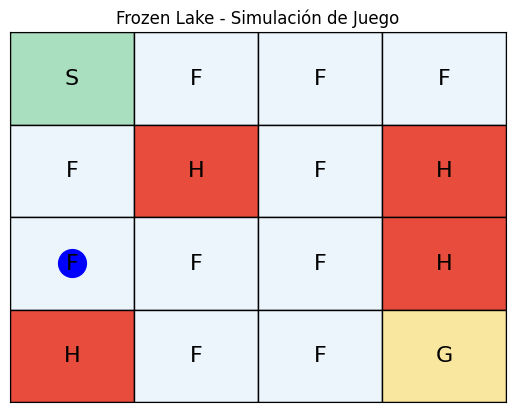

Estado: 8 → Acción: 3


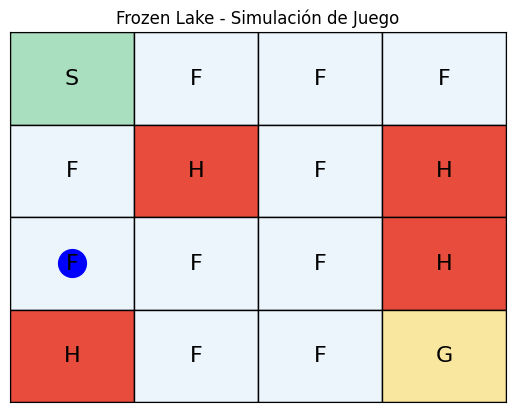

Estado: 8 → Acción: 3


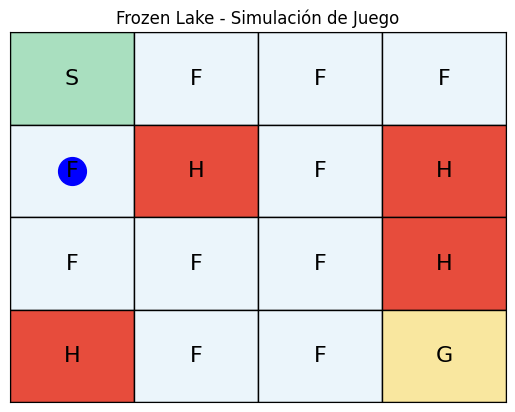

Estado: 4 → Acción: 0


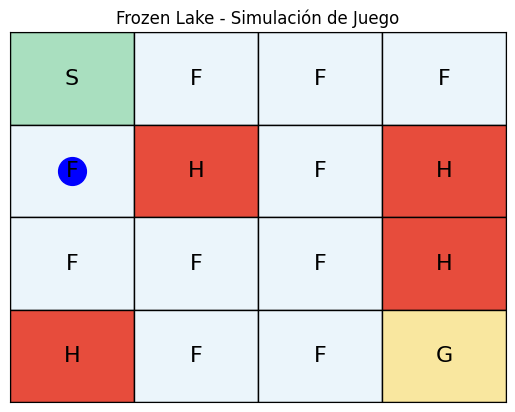

Estado: 4 → Acción: 0


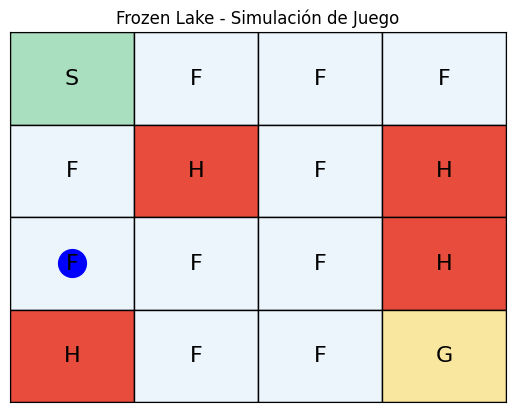

Estado: 8 → Acción: 3


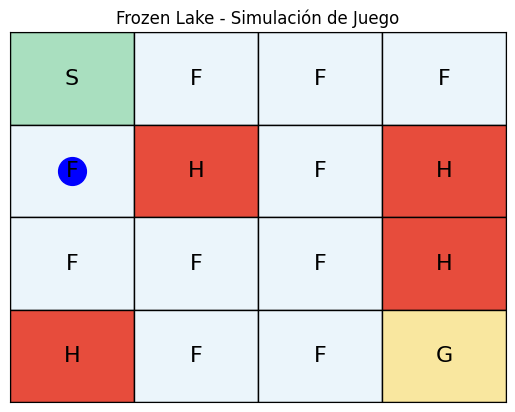

Estado: 4 → Acción: 0


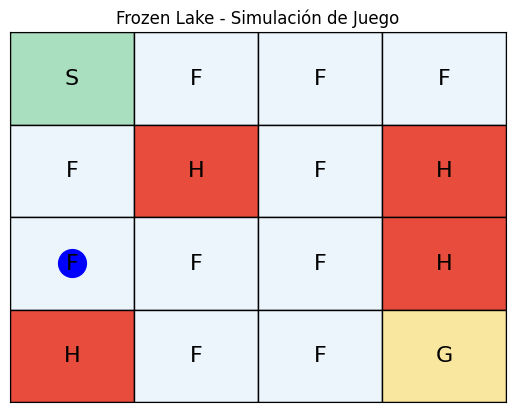

Estado: 8 → Acción: 3


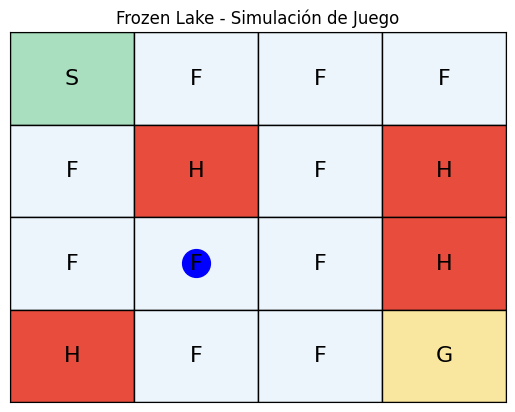

Estado: 9 → Acción: 1


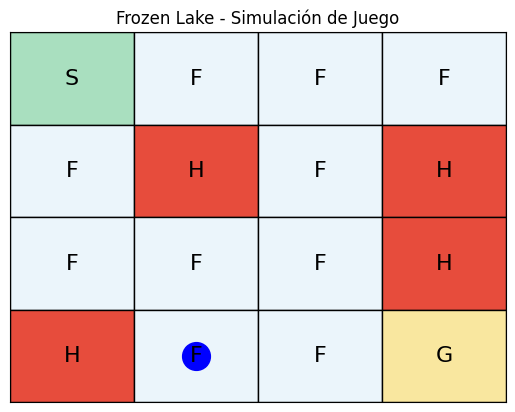

Estado: 13 → Acción: 2


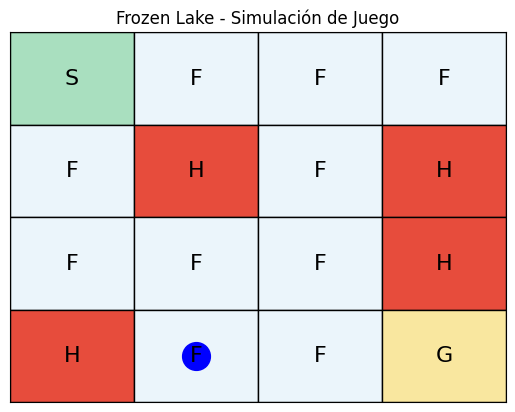

Estado: 13 → Acción: 2


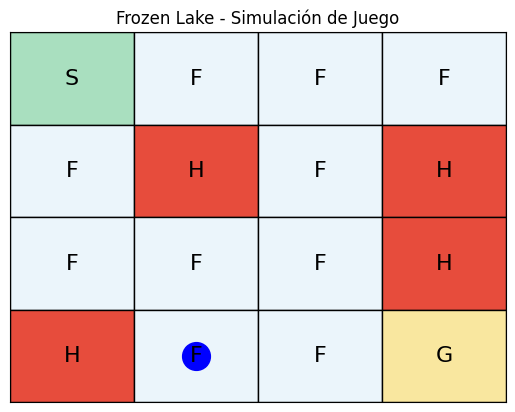

Estado: 13 → Acción: 2


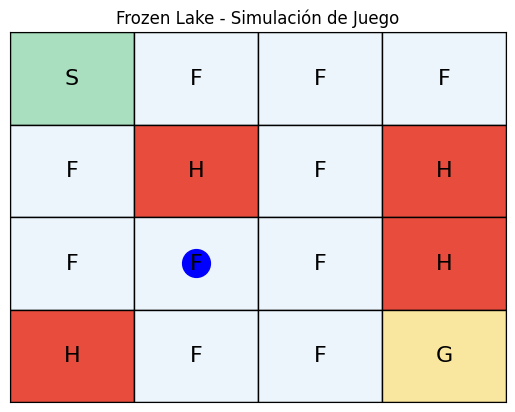

Estado: 9 → Acción: 1


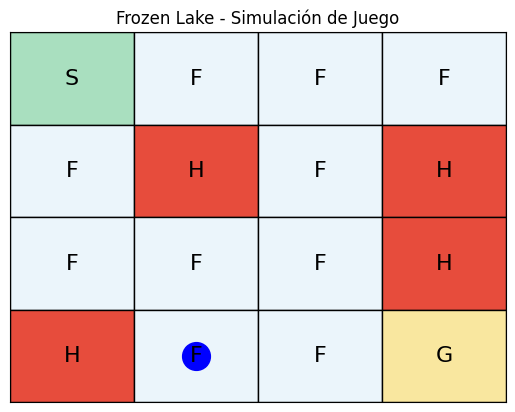

Estado: 13 → Acción: 2


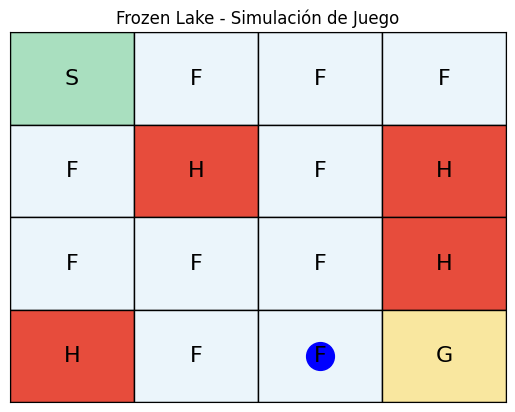

Estado: 14 → Acción: 1


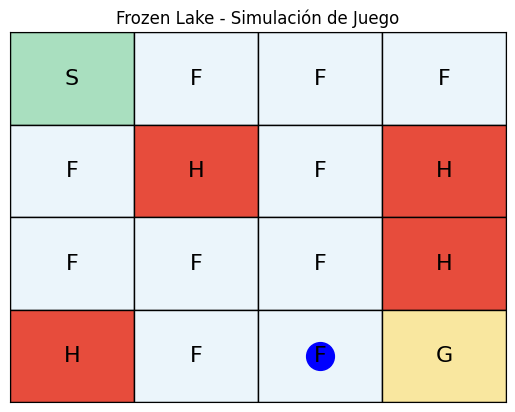

Estado: 14 → Acción: 1


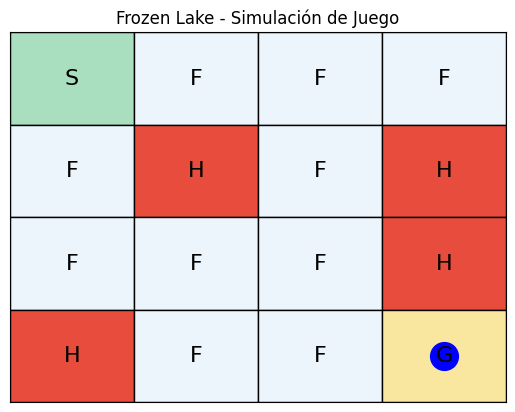

In [9]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import time

# Función para convertir el estado (un entero) a posición (fila, columna)
def state_to_position(state, n_cols):
    return state // n_cols, state % n_cols

# Función para renderizar el tablero con la posición del jugador
def render_board(env, player_pos):
    # Obtener la descripción del tablero y decodificar los bytes a strings
    desc = env.unwrapped.desc
    desc = np.array([[c.decode('utf-8') for c in row] for row in desc])
    n_rows, n_cols = desc.shape

    # Mapeo de colores para cada tipo de casilla
    color_mapping = {'S': '#A9DFBF',  # Start (inicio)
                     'F': '#EBF5FB',  # Frozen (congelado)
                     'H': '#E74C3C',  # Hole (agujero)
                     'G': '#F9E79F'}  # Goal (meta)

    plt.clf()  # Limpiar la figura anterior antes de actualizar

    # Dibujar cada celda con su color y etiquetarla
    for i in range(n_rows):
        for j in range(n_cols):
            rect = plt.Rectangle((j, i), 1, 1,
                                 facecolor=color_mapping.get(desc[i, j], '#FFFFFF'),
                                 edgecolor='black')
            plt.gca().add_patch(rect)
            plt.text(j + 0.5, i + 0.5, desc[i, j],
                     ha='center', va='center', fontsize=16, color='black')

    # Marcar la posición actual del jugador con un círculo azul
    player_i, player_j = player_pos
    plt.plot(player_j + 0.5, player_i + 0.5, 'o', markersize=20, color='blue')

    plt.xlim(0, n_cols)
    plt.ylim(n_rows, 0)
    plt.xticks([])
    plt.yticks([])
    plt.title("Frozen Lake - Simulación de Juego")

    # Forzar la actualización de la figura
    plt.draw()
    plt.pause(0.1)  # Reducir el tiempo para una animación más fluida

# Asegurar que tienes entrenado el Q-table "Q" y el entorno "env"
state, _ = env.reset()
done = False
n_cols = env.unwrapped.desc.shape[1]

# Configurar la figura
plt.ion()
fig = plt.figure(figsize=(6, 6))

# Bucle de simulación usando la política aprendida (acción con mayor Q)
while not done:
    player_pos = state_to_position(state, n_cols)
    render_board(env, player_pos)

    # Seleccionar la acción óptima según la Q-table
    action = np.argmax(Q[state, :])
    print(f"Estado: {state} → Acción: {action}")  # Mostrar el estado y la acción tomada

    state, reward, done, truncated, _ = env.step(action)
    time.sleep(0.1)  # Reducir la pausa para mejor fluidez

# Mostrar el estado final
player_pos = state_to_position(state, n_cols)
render_board(env, player_pos)
plt.ioff()
plt.show()